In [2]:
import torch
import torchaudio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image, transforms
import os
from scipy.io.wavefile import write

ModuleNotFoundError: No module named 'scipy.io.wavefile'

Shape of waveform: torch.Size([1, 36864])
Sample rate of waveform: 16000


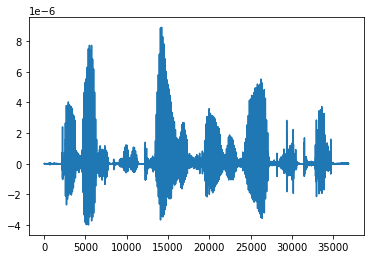

In [2]:
filename = "../Data/speech_TRAIN_1/TIMIT_TRAIN_1/DR1/MEDR0/SA2.WAV"
waveform, sample_rate = torchaudio.load(filename)
waveform[:][0] = waveform[:][0] / sample_rate

print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

plt.figure()
plt.plot(waveform.t().numpy())

Shape of spectrogram: torch.Size([1, 8193, 9217])


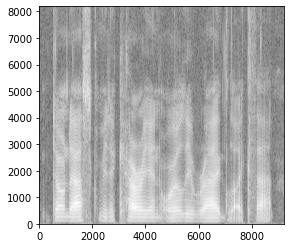

In [3]:
#  freq is n_fft // 2 + 1
# time is the number of window hops (n_frame)
specgram = torchaudio.transforms.Spectrogram(n_fft=16384, win_length=333, hop_length=4)(waveform)
print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure()
plt.imshow(specgram.log2()[0,:,:].numpy(), origin='lower', cmap='gray')

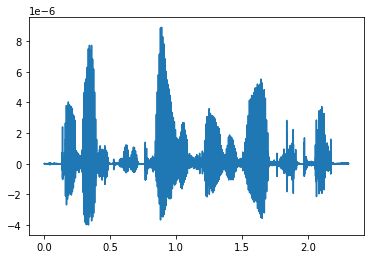

In [4]:
t = np.array(range(0, waveform[0].shape[0])) / sample_rate
plt.plot(t, waveform[0])

In [5]:
t = np.array(range(0, waveform[0].shape[0])) / sample_rate
plt.plot(t, data)


data = waveform[0].t().numpy()



# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.specgram.html
spectrum, freqs, t, im = plt.specgram(data, Fs=sample_rate, NFFT=512, scale_by_freq=True, mode='psd', cmap='gray')
plt.savefig('spec.png')
spectrum.shape

NameError: name 'data' is not defined

In [ ]:
def save_specgram(filename):
#     filename = "../Data/speech_TRAIN_1/TIMIT_TRAIN_1/DR1/MEDR0/SA2.WAV"
    waveform, sample_rate = torchaudio.load(filename)
#     waveform[:][0] = waveform[:][0] / sample_rate
    data = waveform[0].t().numpy()

    #            
    spectrum, freqs, t, im = plt.specgram(data, Fs=sample_rate, NFFT=512, scale_by_freq=True, mode='psd', cmap='gray')
    
    
    path_list = filename.split("/")
    path_list[2] = 'specgram' + path_list[2][6:]
    
    
    spec_name = path_list[4] + '_' + path_list[5] + '_'+ path_list[-1][:-3] + 'png'
    spec_path = ''
    for s in path_list[0:3]:
        spec_path = spec_path + s +'/'
        try:
            os.mkdir(spec_path)
            print(spec_path)
        except:
            pass

    # On enlève les axes pour sauvegarder la figure puis on la clean
    plt.axis('off')
    plt.savefig(spec_path+spec_name, bbox_inches='tight')
    plt.clf()
    plt.cla()

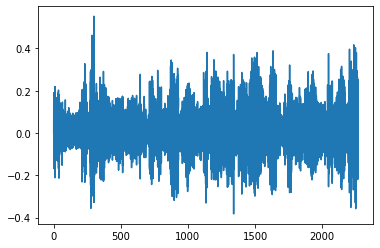

In [3]:
sig_tot = torch.tensor([])
for subdir, dirs, files in os.walk("../Data/speech_TRAIN_2/TIMIT_TRAIN_2/DR5"):
    for file in files:
        if ('.WAV' in file):
            subpath = os.path.join(subdir, file)
#             print(subpath, file)
            waveform, sample_rate = torchaudio.load(subpath)
            sig_tot = torch.cat((sig_tot, waveform), 1)
            
t = np.array(range(0, sig_tot[0].shape[0])) / sample_rate
plt.plot(t, sig_tot[0])

In [4]:
sig_tot.shape

torch.Size([1, 36281638])

In [ ]:
from scipy.io.wavfile import write

sig_tot.shape[1]
data = sig_tot[0].t().numpy()
i=0
while (i < sig_tot.shape[1] - 48000):
    portion = data[i:i+48000]
#     plt.plot(portion)
    write('../Data/sig/sig_' + str(i//48000) + '.wav', sample_rate, portion)
    spectrum, freqs, t, im = plt.specgram(portion, Fs=sample_rate, NFFT=512, scale_by_freq=True, mode='psd', cmap='gray')
    plt.savefig('../Data/sig/spec' + str(i//48000) + '.png')
    i=i+48000
portion.shape

In [ ]:
string = "../Data/speech_TEST/TIMIT_TEST/DR1/FAKS0/SA1.WAV"
string = string.split("/")
string[2] = 'specgram_TEST'
string[-1] = string[-1][:-3] + 'png'

spec_path = ''
for s in string[0:-1]:
    spec_path = spec_path + s + '/'
# spec_path = spec_path[:-1]
spec_path

In [ ]:
string = "../Data/speech_TEST/TIMIT_TEST/DR1/FAKS0/SA1.WAV"
waveform, sample_rate = torchaudio.load(filename)
spectrum, freqs, t, im = plt.specgram(data, Fs=sample_rate, NFFT=512, scale_by_freq=True, mode='psd', cmap='gray')
im.imshow()

In [14]:
from load_specgram import *

filepath = "../Data/speech_TRAIN_2"
generate_specgram(filepath)
